In [1]:
import os

In [2]:
os.chdir(os.path.split(os.getcwd())[0])

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import matplotlib.style as style

In [5]:
style.use('seaborn-poster')

### Parse raw logs and create DataFrame

In [80]:
def parse_raw_log(log):
    data = []
    lines = log.split('\n')
    for line in lines[:-1]:
        raw = line.split(': ')
        if raw[0].split(', ')[1] == 'LOG':
            entries = raw[1].split(', ')
            datum = []
            for entry in entries:
                value = entry.split(':')[1]
                try:
                    datum.append(float(value))
                except ValueError:
                    datum.append(value)

            data.append(datum)
    
    return data

In [100]:
experiment_folder = 'Exp_d0.999_emin0.005_g0.5_bs128_clip100'
log_path = os.path.join('experiments', experiment_folder, 'training.log')
with open(log_path, 'r') as f:
    log = f.read()
    
data = parse_raw_log(log)

columns = ['episode', 'step', 'action', 'kind', 'epsilon', 'reward', 'best_mean_reward', 'loss']
data_df = pd.DataFrame(data, columns = columns)
data_df = data_df.astype({'episode': int, 'step': int, 'action': int})

In [101]:
data_df.head()

,episode,step,action,kind,epsilon,reward,best_mean_reward,loss
0,1,1,81,random,1.0,-100.000000,-inf,92.296112
1,1,2,83,random,1.0,2.196764,-inf,91.520775
2,1,3,151,random,1.0,-100.000000,-inf,91.817734
3,1,4,165,random,1.0,-100.000000,-inf,91.599091
4,1,5,67,random,1.0,-100.000000,-inf,90.943886


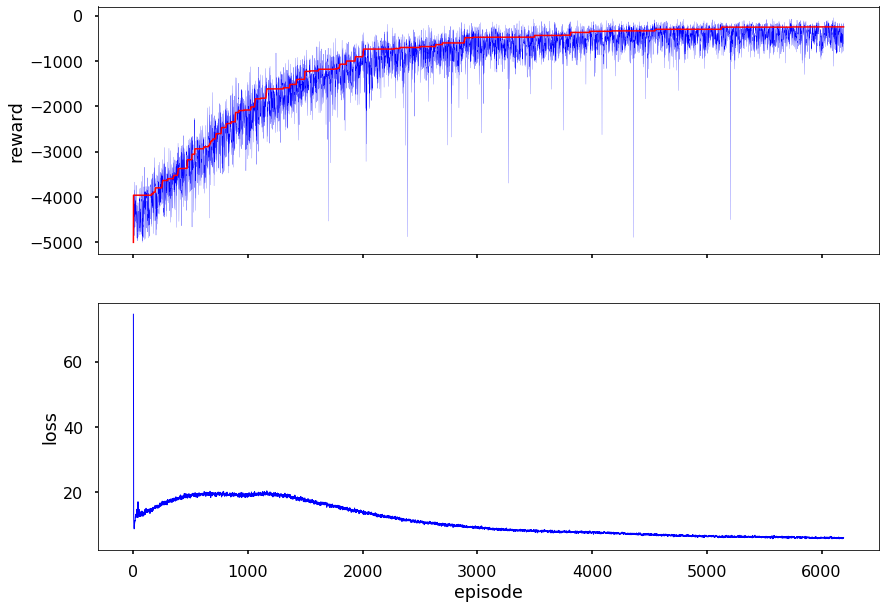

In [102]:
fig, ax = plt.subplots(figsize = (14, 10), nrows = 2, ncols = 1, sharex = True)
groupby_episode = data_df.groupby('episode').mean()
rewards = data_df.groupby('episode').sum()['reward'].values[:-1]
best_mean_reward = groupby_episode['best_mean_reward'].values[:-1]
mean_loss = groupby_episode['loss'].values[:-1]

ax[0].plot(np.arange(1, len(rewards) + 1), np.clip(rewards, -5000, None), label = 'reward', color = 'blue', lw = 0.2)
ax[0].plot(np.arange(1, len(best_mean_reward) + 1), np.clip(best_mean_reward, -5000, None), label = 'best_mean_reward', color = 'red', lw = 1.5)
ax[0].set_ylabel('reward')

ax[1].plot(np.arange(1, len(mean_loss) + 1), mean_loss, label = 'loss', color = 'blue', lw = 1)
ax[1].set_xlabel('episode')
ax[1].set_ylabel('loss')
plt.show()